In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng


nobel = pd.read_csv("laureates.csv")

In [2]:
print(nobel.describe())

                id         year       share
count   975.000000   975.000000  975.000000
mean    496.221538  1972.471795    2.014359
std     290.594353    34.058064    0.943909
min       1.000000  1901.000000    1.000000
25%     244.500000  1948.500000    1.000000
50%     488.000000  1978.000000    2.000000
75%     746.500000  2001.000000    3.000000
max    1009.000000  2021.000000    4.000000


In [3]:
print(nobel.head())

   id       firstname    surname        born        died  \
0   1  Wilhelm Conrad    Röntgen  1845-03-27  1923-02-10   
1   2      Hendrik A.    Lorentz  1853-07-18  1928-02-04   
2   3          Pieter     Zeeman  1865-05-25  1943-10-09   
3   4           Henri  Becquerel  1852-12-15  1908-08-25   
4   5          Pierre      Curie  1859-05-15  1906-04-19   

             bornCountry bornCountryCode                bornCity  \
0  Prussia (now Germany)              DE  Lennep (now Remscheid)   
1        the Netherlands              NL                  Arnhem   
2        the Netherlands              NL              Zonnemaire   
3                 France              FR                   Paris   
4                 France              FR                   Paris   

       diedCountry diedCountryCode   diedCity gender  year category  \
0          Germany              DE     Munich   male  1901  physics   
1  the Netherlands              NL        NaN   male  1902  physics   
2  the Netherland

In [4]:
print(nobel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 975 non-null    int64 
 1   firstname          975 non-null    object
 2   surname            945 non-null    object
 3   born               974 non-null    object
 4   died               975 non-null    object
 5   bornCountry        946 non-null    object
 6   bornCountryCode    946 non-null    object
 7   bornCity           943 non-null    object
 8   diedCountry        640 non-null    object
 9   diedCountryCode    640 non-null    object
 10  diedCity           634 non-null    object
 11  gender             975 non-null    object
 12  year               975 non-null    int64 
 13  category           975 non-null    object
 14  overallMotivation  23 non-null     object
 15  share              975 non-null    int64 
 16  motivation         975 non-null    object
 1

In [5]:
print(nobel[nobel["surname"] == "Feynman"])

    id   firstname  surname        born        died bornCountry  \
86  86  Richard P.  Feynman  1918-05-11  1988-02-15         USA   

   bornCountryCode     bornCity diedCountry diedCountryCode        diedCity  \
86              US  New York NY         USA              US  Los Angeles CA   

   gender  year category overallMotivation  share  \
86   male  1965  physics               NaN      3   

                                           motivation  \
86  "for their fundamental work in quantum electro...   

                                            name         city country  
86  California Institute of Technology (Caltech)  Pasadena CA     USA  


In [6]:
print(nobel[nobel["surname"] == "Feynman"].year)

86    1965
Name: year, dtype: int64


In [7]:
print(nobel[nobel["surname"] == "Feynman", "year"])

InvalidIndexError: (0      False
1      False
2      False
3      False
4      False
       ...  
970    False
971    False
972    False
973    False
974    False
Name: surname, Length: 975, dtype: bool, 'year')

In [8]:
print(nobel.loc[nobel["surname"] == "Feynman", "year"])

86    1965
Name: year, dtype: int64


In [9]:
print(nobel.loc[nobel["firstname"] == "Kip", "year"])

Series([], Name: year, dtype: int64)


In [10]:
print(nobel.loc[nobel["firstname"] == "Kip S.", "year"])

916    2017
Name: year, dtype: int64


In [11]:
print(nobel.loc[nobel["firstname"] == "Kip S."])

      id firstname surname        born        died bornCountry  \
916  943    Kip S.  Thorne  1940-06-01  0000-00-00         USA   

    bornCountryCode  bornCity diedCountry diedCountryCode diedCity gender  \
916              US  Logan UT         NaN             NaN      NaN   male   

     year category overallMotivation  share  \
916  2017  physics               NaN      4   

                                            motivation  \
916  "for decisive contributions to the LIGO detect...   

                         name city country  
916  LIGO/VIRGO Collaboration  NaN     NaN  


In [12]:
print(nobel.loc[nobel["firstname"] == "Kip S."].year)

916    2017
Name: year, dtype: int64


In [13]:
print(nobel.loc[nobel["firstname"].str.contains("Kip")])

      id firstname surname        born        died bornCountry  \
916  943    Kip S.  Thorne  1940-06-01  0000-00-00         USA   

    bornCountryCode  bornCity diedCountry diedCountryCode diedCity gender  \
916              US  Logan UT         NaN             NaN      NaN   male   

     year category overallMotivation  share  \
916  2017  physics               NaN      4   

                                            motivation  \
916  "for decisive contributions to the LIGO detect...   

                         name city country  
916  LIGO/VIRGO Collaboration  NaN     NaN  


In [14]:
print(nobel.loc[nobel["surname"].str.contains("Feynman")])

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [15]:
print(nobel.loc[nobel["surname"].isnull()])

      id                                          firstname surname  \
465  467                     Institute of International Law     NaN   
474  477               Permanent International Peace Bureau     NaN   
479  482           International Committee of the Red Cross     NaN   
480  482           International Committee of the Red Cross     NaN   
481  482           International Committee of the Red Cross     NaN   
502  503           Nansen International Office for Refugees     NaN   
506  508                            Friends Service Council     NaN   
507  509                 American Friends Service Committee     NaN   
513  515  Office of the United Nations High Commissioner...     NaN   
514  515  Office of the United Nations High Commissioner...     NaN   
520  523                      League of Red Cross Societies     NaN   
522  525                     United Nations Children's Fund     NaN   
524  527                  International Labour Organization     NaN   
528  5

In [16]:
print(nobel.loc[nobel["surname"].str.contains("Feynman", na=False)])

    id   firstname  surname        born        died bornCountry  \
86  86  Richard P.  Feynman  1918-05-11  1988-02-15         USA   

   bornCountryCode     bornCity diedCountry diedCountryCode        diedCity  \
86              US  New York NY         USA              US  Los Angeles CA   

   gender  year category overallMotivation  share  \
86   male  1965  physics               NaN      3   

                                           motivation  \
86  "for their fundamental work in quantum electro...   

                                            name         city country  
86  California Institute of Technology (Caltech)  Pasadena CA     USA  


In [17]:
print(len(nobel.loc[nobel["surname"].str.contains("Feynman", na=False)]))

1


In [18]:
curies = nobel.loc[nobel["surname"].str.contains("Curie", na=False)]
print(curies)

      id firstname       surname        born        died  \
4      5    Pierre         Curie  1859-05-15  1906-04-19   
5      6     Marie         Curie  1867-11-07  1934-07-04   
6      6     Marie         Curie  1867-11-07  1934-07-04   
191  194     Irène  Joliot-Curie  1897-09-12  1956-03-17   

                     bornCountry bornCountryCode bornCity diedCountry  \
4                         France              FR    Paris      France   
5    Russian Empire (now Poland)              PL   Warsaw      France   
6    Russian Empire (now Poland)              PL   Warsaw      France   
191                       France              FR    Paris      France   

    diedCountryCode    diedCity  gender  year   category overallMotivation  \
4                FR       Paris    male  1903    physics               NaN   
5                FR  Sallanches  female  1903    physics               NaN   
6                FR  Sallanches  female  1911  chemistry               NaN   
191              FR  

In [19]:
print(curies[["firstname", "surname"]])

    firstname       surname
4      Pierre         Curie
5       Marie         Curie
6       Marie         Curie
191     Irène  Joliot-Curie


In [20]:
print(nobel.groupby(["firstname", "surname"]).size())

firstname   surname    
A. Michael  Spence         1
Aage N.     Bohr           1
Aaron       Ciechanover    1
            Klug           1
Abdulrazak  Gurnah         1
                          ..
Youyou      Tu             1
Yuan T.     Lee            1
Yves        Chauvin        1
Zhores      Alferov        1
Élie        Ducommun       1
Length: 941, dtype: int64


In [21]:
print(nobel.groupby(["firstname", "surname"]).size().sort_values())

firstname     surname 
A. Michael    Spence      1
Nicolay G.    Basov       1
Niels         Bohr        1
Niels K.      Jerne       1
Niels Ryberg  Finsen      1
                         ..
Élie          Ducommun    1
Linus         Pauling     2
John          Bardeen     2
Frederick     Sanger      2
Marie         Curie       2
Length: 941, dtype: int64


In [22]:
laureates = nobel.groupby(["id", "firstname", "surname"])
sizes = laureates.size()
print(sizes[sizes > 1])

id   firstname  surname
6    Marie      Curie      2
66   John       Bardeen    2
217  Linus      Pauling    2
222  Frederick  Sanger     2
dtype: int64


In [23]:
print(nobel.loc[nobel["born"] == "1879-03-14"])

    id firstname   surname        born        died bornCountry  \
25  26    Albert  Einstein  1879-03-14  1955-04-18     Germany   

   bornCountryCode bornCity diedCountry diedCountryCode      diedCity gender  \
25              DE      Ulm         USA              US  Princeton NJ   male   

    year category overallMotivation  share  \
25  1921  physics               NaN      1   

                                           motivation  \
25  "for his services to Theoretical Physics and e...   

                                                 name    city  country  
25  Kaiser-Wilhelm-Institut (now Max-Planck-Instit...  Berlin  Germany  


In [24]:
print(nobel.loc[nobel["born"] == "1879-03-14"]["surname"])

25    Einstein
Name: surname, dtype: object


In [25]:
print(nobel.loc[nobel["born"].str.contains("06-28", na=False)])

      id    firstname         surname        born        died  \
79    79        Maria  Goeppert Mayer  1906-06-28  1972-02-20   
125  126        Klaus    von Klitzing  1943-06-28  0000-00-00   
281  283  F. Sherwood         Rowland  1927-06-28  2012-03-10   
304  306       Alexis          Carrel  1873-06-28  1944-11-05   
598  607        Luigi      Pirandello  1867-06-28  1936-12-10   
790  809     Muhammad           Yunus  1940-06-28  0000-00-00   
889  916   William C.        Campbell  1930-06-28  0000-00-00   

                             bornCountry bornCountryCode  \
79                  Germany (now Poland)              PL   
125  German-occupied Poland (now Poland)              PL   
281                                  USA              US   
304                               France              FR   
598                                Italy              IT   
790       British India (now Bangladesh)              BD   
889                              Ireland              IE   

In [26]:
print(nobel.loc[(nobel["born"].astype('string').str.contains("06-28")) &
                (nobel["category"] == "physics")])

      id firstname         surname        born        died  \
79    79     Maria  Goeppert Mayer  1906-06-28  1972-02-20   
125  126     Klaus    von Klitzing  1943-06-28  0000-00-00   

                             bornCountry bornCountryCode  \
79                  Germany (now Poland)              PL   
125  German-occupied Poland (now Poland)              PL   

                     bornCity diedCountry diedCountryCode      diedCity  \
79   Kattowitz (now Katowice)         USA              US  San Diego CA   
125                   Schroda         NaN             NaN           NaN   

     gender  year category overallMotivation  share  \
79   female  1963  physics               NaN      4   
125    male  1985  physics               NaN      1   

                                            motivation  \
79   "for their discoveries concerning nuclear shel...   
125   "for the discovery of the quantized Hall effect"   

                                            name          city  c

In [27]:
print(nobel.iloc[79])

id                                                                  79
firstname                                                        Maria
surname                                                 Goeppert Mayer
born                                                        1906-06-28
died                                                        1972-02-20
bornCountry                                       Germany (now Poland)
bornCountryCode                                                     PL
bornCity                                      Kattowitz (now Katowice)
diedCountry                                                        USA
diedCountryCode                                                     US
diedCity                                                  San Diego CA
gender                                                          female
year                                                              1963
category                                                       physics
overal

In [28]:
bethe = nobel.loc[nobel["surname"] == "Bethe"]
print(bethe["born"])
print(bethe["died"])

88    1906-07-02
Name: born, dtype: object
88    2005-03-06
Name: died, dtype: object


In [29]:
print(bethe["died"] - bethe["born"])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [30]:
diff = pd.to_datetime(bethe["died"]) - pd.to_datetime(bethe["born"])
print(diff)

88   36042 days
dtype: timedelta64[ns]


In [31]:
print(diff/np.timedelta64(1, "Y"))

88    98.679644
dtype: float64


In [32]:
nobel["born"] = pd.to_datetime(nobel["born"])

ParserError: month must be in 1..12: 1873-00-00 present at position 465

In [33]:
print(nobel.loc[nobel["born"] == "1873-00-00"])

      id                       firstname surname        born        died  \
465  467  Institute of International Law     NaN  1873-00-00  0000-00-00   

    bornCountry bornCountryCode bornCity diedCountry diedCountryCode diedCity  \
465         NaN             NaN      NaN         NaN             NaN      NaN   

    gender  year category overallMotivation  share  \
465    org  1904    peace               NaN      1   

                                            motivation name city country  
465  "for its striving in public law to develop pea...  NaN  NaN     NaN  


In [34]:
nobel["born"] = pd.to_datetime(nobel["born"], errors="coerce")
nobel["died"] = pd.to_datetime(nobel["died"], errors="coerce")
print(nobel.iloc[465].born)

NaT


In [35]:
nobel["lifespan"] = (nobel["died"] - nobel["born"])/np.timedelta64(1, "Y")

In [36]:
bethe = nobel.loc[nobel["surname"] == "Bethe"]
print(bethe["lifespan"])

88    98.679644
Name: lifespan, dtype: float64


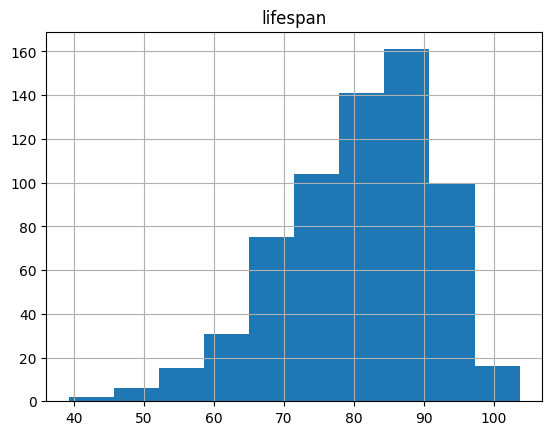

In [37]:
nobel.hist(column="lifespan")
plt.show()

In [38]:
print(nobel.loc[nobel["firstname"] == "Frédéric"])

      id firstname  surname       born       died bornCountry bornCountryCode  \
190  193  Frédéric   Joliot 1900-03-19 1958-08-14      France              FR   
461  463  Frédéric    Passy 1822-05-20 1912-06-12      France              FR   
568  573  Frédéric  Mistral 1830-09-08 1914-03-25      France              FR   

     bornCity diedCountry diedCountryCode  ... gender  year    category  \
190     Paris      France              FR  ...   male  1935   chemistry   
461     Paris      France              FR  ...   male  1901       peace   
568  Maillane      France              FR  ...   male  1904  literature   

    overallMotivation share  \
190               NaN     2   
461               NaN     2   
568               NaN     2   

                                            motivation                name  \
190  "in recognition of their synthesis of new radi...  Institut du Radium   
461  "for his lifelong work for international peace...                 NaN   
568  "in recogn

In [39]:
print(nobel.loc[nobel["surname"].str.contains("Curie", na=False)])

      id firstname       surname       born       died  \
4      5    Pierre         Curie 1859-05-15 1906-04-19   
5      6     Marie         Curie 1867-11-07 1934-07-04   
6      6     Marie         Curie 1867-11-07 1934-07-04   
191  194     Irène  Joliot-Curie 1897-09-12 1956-03-17   

                     bornCountry bornCountryCode bornCity diedCountry  \
4                         France              FR    Paris      France   
5    Russian Empire (now Poland)              PL   Warsaw      France   
6    Russian Empire (now Poland)              PL   Warsaw      France   
191                       France              FR    Paris      France   

    diedCountryCode  ...  gender  year   category overallMotivation share  \
4                FR  ...    male  1903    physics               NaN     4   
5                FR  ...  female  1903    physics               NaN     4   
6                FR  ...  female  1911  chemistry               NaN     1   
191              FR  ...  female  1